In [1]:
from os.path import join
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import dirname, abspath,join
import sys
ROOT_DIR = "../"
sys.path.append(ROOT_DIR)
from process_pipeline.labels import *

INPUT_DIR,OUTPUT_DIR,INTERMEDIATE_DIR = get_dirs(ROOT_DIR)

TypeError: get_dirs() missing 1 required positional argument: 'dataset_id'

In [3]:
id_label = "id"
design_label = "SAP"
version_label = "Version"
batch_label = "WA"
step_label = "PaPos"
variable_label = "Variable"
process_label = "Process"
given_label = "Given"

In [4]:
X_np = np.load(join(OUTPUT_DIR,"X_np.npy"))
Y_np = np.load(join(OUTPUT_DIR,"Y_np.npy"))

In [5]:
df_pc = pd.read_csv(join(INTERMEDIATE_DIR,input_raw_filename))
df_lev = pd.read_csv(join(INTERMEDIATE_DIR,input_leveled_filename))
df_pc.head()


,Unnamed: 0,Value,Time,Variable,Process,WA,PaPos,Version,SAP,id
0,0,0.033642,1/7/22 2:31 AM,las_22,Laser,CTBV,40,C,426816,41453A
1,1,0.033122,1/7/22 2:31 AM,las_23,Laser,CTBV,40,C,426816,41453A
2,2,0.495268,1/7/22 2:31 AM,las_28,Laser,CTBV,40,C,426816,41453A
3,3,0.027895,1/7/22 2:31 AM,las_29,Laser,CTBV,40,C,426816,41453A
4,4,0.005162,1/7/22 2:31 AM,las_30,Laser,CTBV,40,C,426816,41453A


 # DataFrame preparation
 ## Check weird Plasma double steps

In [6]:
sel_design = 453828
sel_version = "B"

df_sel = df_lev.set_index([input_design_label, input_version_label]).loc[sel_design].loc[sel_version].reset_index()

In [7]:
# check weird plasma step
steps_check = [251,271,461,481] #steps where plasma overlaps with other processes
for step in steps_check:
    df_sel_inspect = df_sel.set_index(input_step_label).loc[step][input_value_label]
    print(f"Step: {step}")
    print("Is Nan: ", df_sel_inspect.isna().sum())
    print("Not Nan: ", df_sel_inspect.notna().sum())
    print("Not nan but zero: ", df_sel_inspect[(df_sel_inspect.notna()) & (df_sel_inspect==0)].count())
    print("Not nan not zero: ", df_sel_inspect[(df_sel_inspect.notna()) & (df_sel_inspect!=0)].count())
    
#TODO: which variable is not zero?

Step: 251
Is Nan:  27626
Not Nan:  125248
Not nan but zero:  27122
Not nan not zero:  98126
Step: 271
Is Nan:  141338
Not Nan:  11536
Not nan but zero:  3448
Not nan not zero:  8088
Step: 461
Is Nan:  19786
Not Nan:  133088
Not nan but zero:  29302
Not nan not zero:  103786
Step: 481
Is Nan:  140554
Not Nan:  12320
Not nan but zero:  3742
Not nan not zero:  8578


In [8]:
df_plasma = pd.read_csv("../data/input/plasma.csv",sep = ";",skiprows=11)
df_plasma_sel = df_plasma.set_index(["ArtikelNr","ArtikelVersion"]).loc[sel_design].loc[sel_version]
df_plasma_sel.head()

C:\Users\ScipioneFrancesco\AppData\Local\Temp\ipykernel_11080\516380458.py:1: DtypeWarning: Columns (24,36,58,71) have mixed types. Specify dtype option on import or set low_memory=False.
  df_plasma = pd.read_csv("../data/input/plasma.csv",sep = ";",skiprows=11)


,WA,PaNr,Machine,MachineID,Position,Reihe,Spalte,PanelNummer,Warentraeger,Parameter,...,SecondPumpSpeed_Percent Mean,Gas1Pressure_Bar Mean,Gas2Pressure_Bar Mean,Gas3Pressure_Bar Mean,Gas4Pressure_Bar Mean,Gas5Pressure_Bar Mean,CDAPressure_Bar Mean,RFVoltage_V Mean,RFCurrent_A Mean,CreateDate Mean_2
ArtikelVersion,,,,,,,,,,,,,,,,,,,,,
B,CSQG,68846,Herkules,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
B,CSQH,68847,Herkules,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
B,CTAO,69109,Herkules,1095.0,460.0,1.0,1.0,20.0,NaN,Desmear,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
B,CTAO,69109,Herkules,1095.0,460.0,1.0,1.0,20.0,NaN,Desmear,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
B,CTAO,69109,Herkules,1095.0,460.0,1.0,1.0,23.0,NaN,Desmear,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [9]:
# concatenate Dyconex feedback with scripts output
# df_sel_steps_pro = df_sel[[input_step_label,input_process_label]].drop_duplicates()
# #df_lev_steps_pro.to_excel("../data/output/steps_process_list.xlsx")
# df_Dyconex_survey = pd.read_excel("../data/input/Dyconex_survey_436425.xlsx", usecols=[0, 1, 2])
# #df_lev_steps_pro.to_excel("../data/output/steps_process_list.xlsx")
# pd.concat([df_Dyconex_survey.set_index("Pos"),df_sel_steps_pro.set_index(input_step_label)],axis=1).to_excel("../data/output/steps_process_list_survey.xlsx")

## Select steps

In [10]:
df_steps_sel = pd.read_excel("../data/intermediate/steps_selected.xlsx")
steps = np.array(df_steps_sel[df_steps_sel['Select']]["Step"])
filtered_data = df_sel[df_sel[input_step_label].isin(steps)]
filtered_data.to_csv("../data/intermediate/x_prochain_lev_sel.csv")

# Data info plots

C:\Users\ScipioneFrancesco\AppData\Local\Temp\ipykernel_17124\1111894469.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_plot["Time"] = pd.to_datetime(df_plot["Time"]).round("30D")


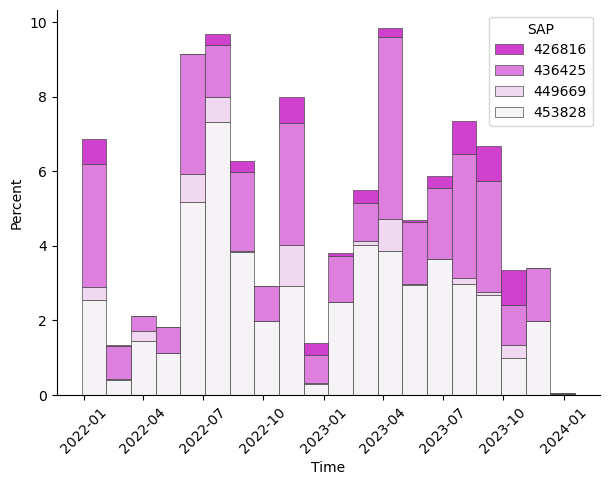

In [5]:
f, ax = plt.subplots(figsize=(7, 5))

sns.despine(f)

df_plot = df_pc.copy()
df_plot["Time"] = pd.to_datetime(df_plot["Time"]).round("30D")
df_plot = df_plot.sort_values("Time")

sns.histplot(data=df_plot, x="Time", hue="SAP", multiple="stack",
             palette="light:m_r",edgecolor=".3",linewidth=.5,bins=20,stat="percent", ax = ax)

plt.xticks(rotation=45)
plt.show()

In [6]:
processes= df_pc["Process"].unique()
designs = df_pc[design_label].unique()
processes

array(['Laser', 'Plasma', 'Galvanic', 'Multibond', 'Microetch'],
      dtype=object)

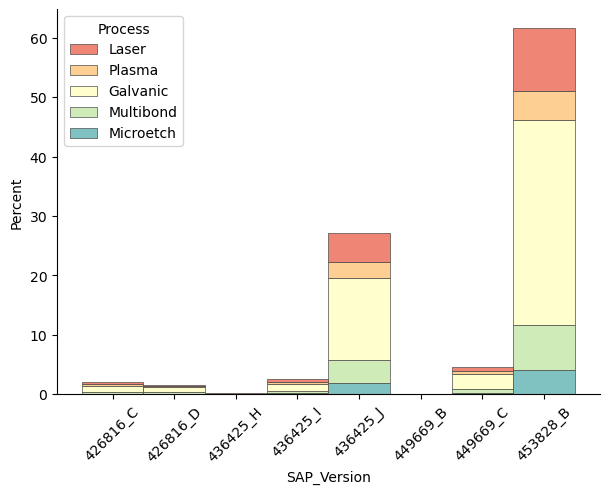

In [7]:
df_plot = df_lev.copy()
df_plot["SAP"] = df_plot["SAP"].apply(lambda x: str(x))
df_plot["SAP_Version"] = df_plot["SAP"]+"_"+df_plot["Version"]

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    data = df_plot,
    x="SAP_Version", 
    hue="Process", 
    hue_order=processes,
    multiple="stack",
    palette="Spectral",
    edgecolor=".3",
    linewidth=.5,
    stat="percent")

plt.xticks(rotation=45)
plt.show()

# Data Leveling
## Before Leveling

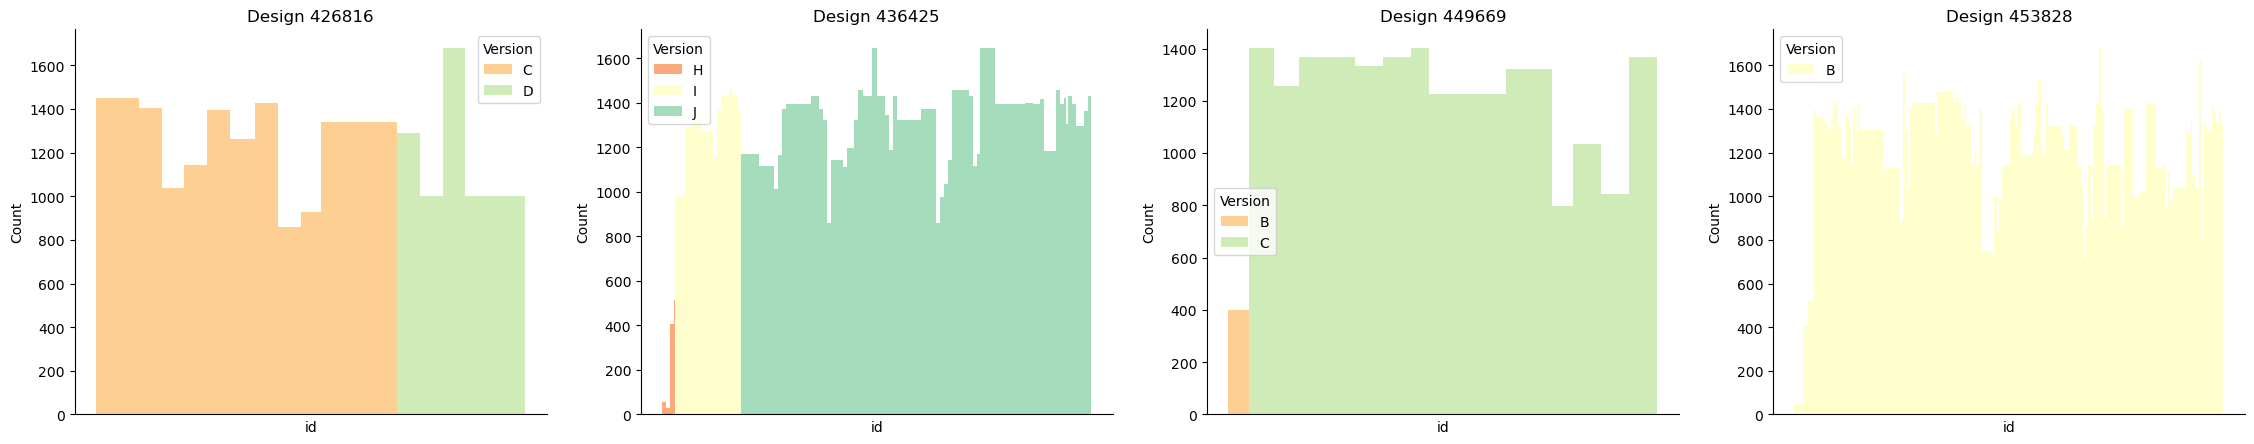

In [8]:
multi = designs
sub_label = design_label


f, ax = plt.subplots(1,len(multi),figsize=(7*len(multi), 5))
sns.despine(f)

for i, sub_class in enumerate(multi):
        
    sns.histplot(
        data = df_pc.set_index(design_label).loc[sub_class],
        x=id_label, hue=version_label, multiple="stack",palette="Spectral",edgecolor=".3",linewidth=0,ax=ax[i])
    
    ax[i].axes.get_xaxis().set_ticks([])
    ax[i].set_title(f"Design {sub_class}")

## After Leveling

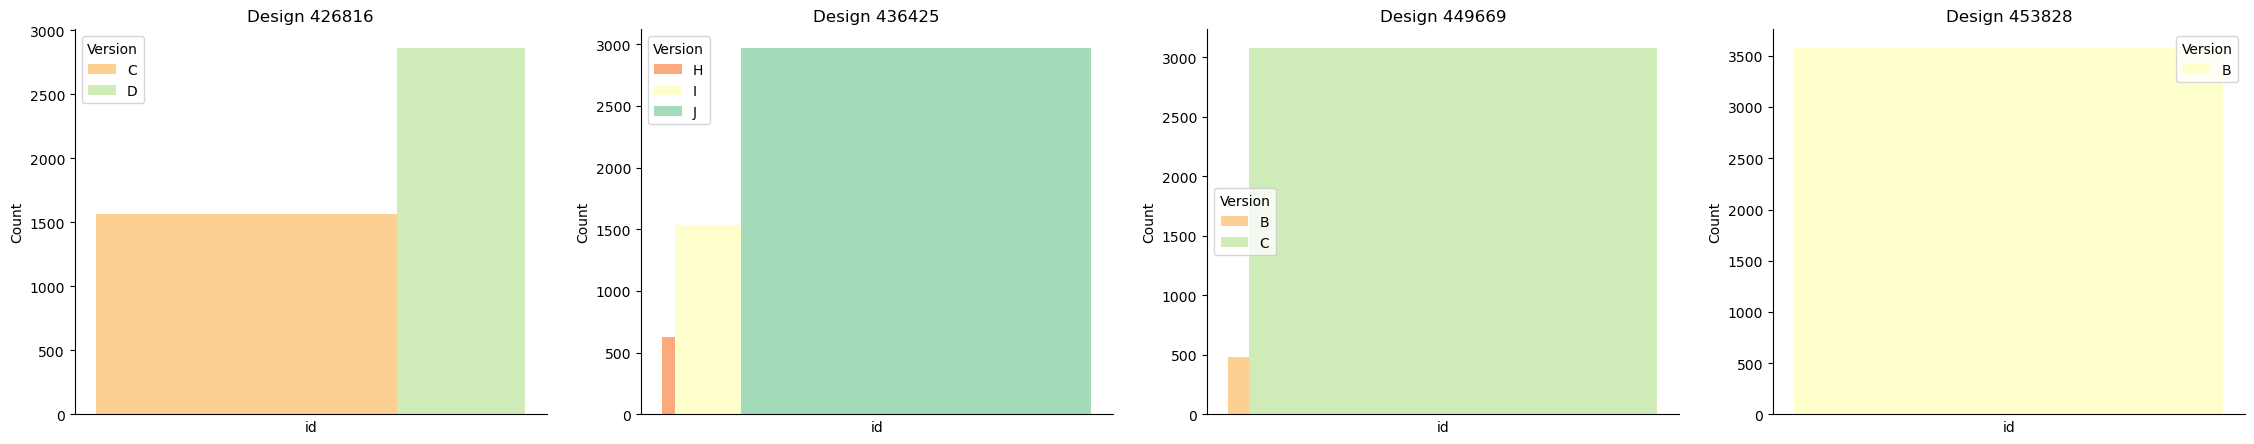

In [9]:
f, ax = plt.subplots(1,len(multi),figsize=(7*len(multi), 5))
sns.despine(f)

for i, sub_class in enumerate(multi):
        
    sns.histplot(
        data = df_lev.set_index(design_label).loc[sub_class],
        x=id_label, hue=version_label, multiple="stack",palette="Spectral",edgecolor=".3",linewidth=0,ax=ax[i])
    
    ax[i].axes.get_xaxis().set_ticks([])
    ax[i].set_title(f"Design {sub_class}")

In [10]:
processes = df_lev[input_process_label].unique()
processes

array(['Laser', 'Plasma', 'Galvanic', 'Multibond', 'Microetch'],
      dtype=object)

c:\Users\ScipioneFrancesco\.conda\envs\process_pipeline\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\ScipioneFrancesco\.conda\envs\process_pipeline\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


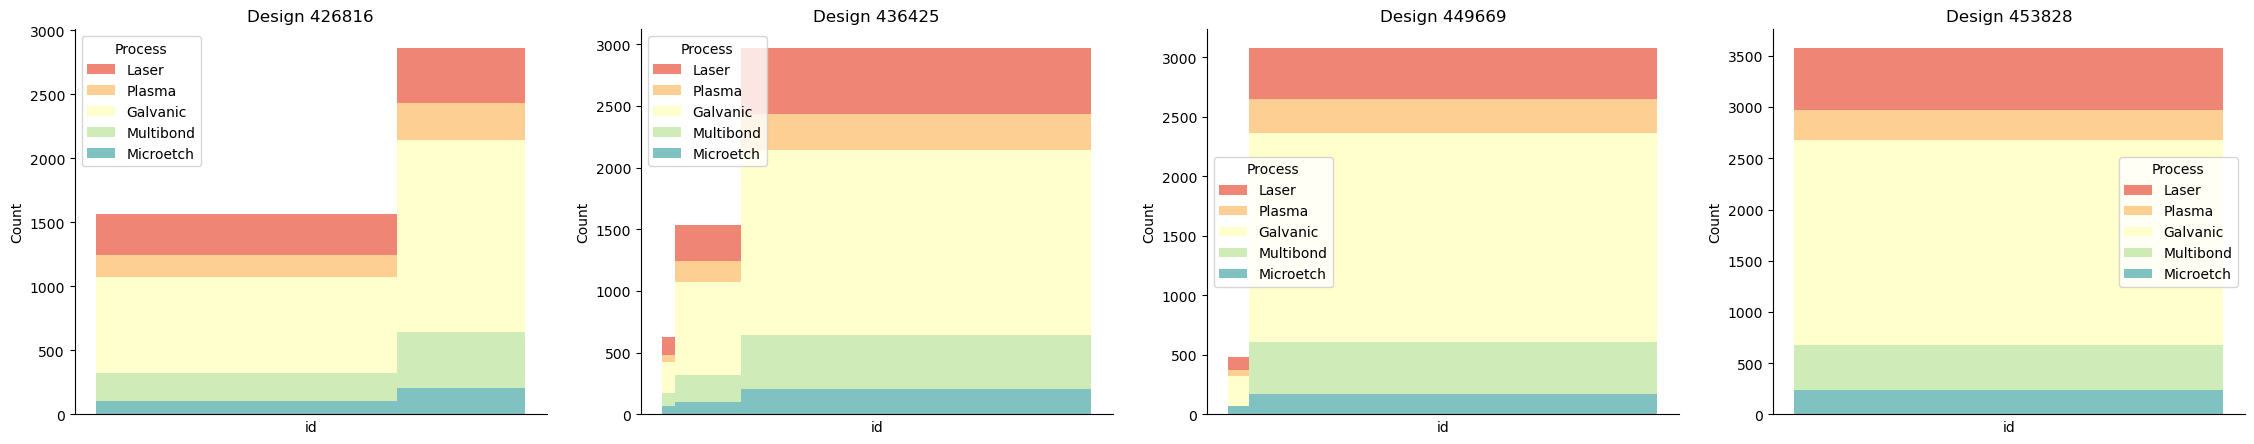

In [11]:
f, ax = plt.subplots(1,len(multi),figsize=(7*len(multi), 5))
sns.despine(f)



for i, sub_class in enumerate(multi):
    
    data = df_lev.set_index(design_label).loc[sub_class]
    
    sns.histplot(
        data = data,
        x=input_id_label, hue=input_process_label, hue_order=processes, 
        multiple="stack",palette="Spectral",edgecolor=".3",linewidth=0,ax=ax[i])
    
    ax[i].axes.get_xaxis().set_ticks([])
    ax[i].set_title(f"Design {sub_class}")

## Lot's of voids

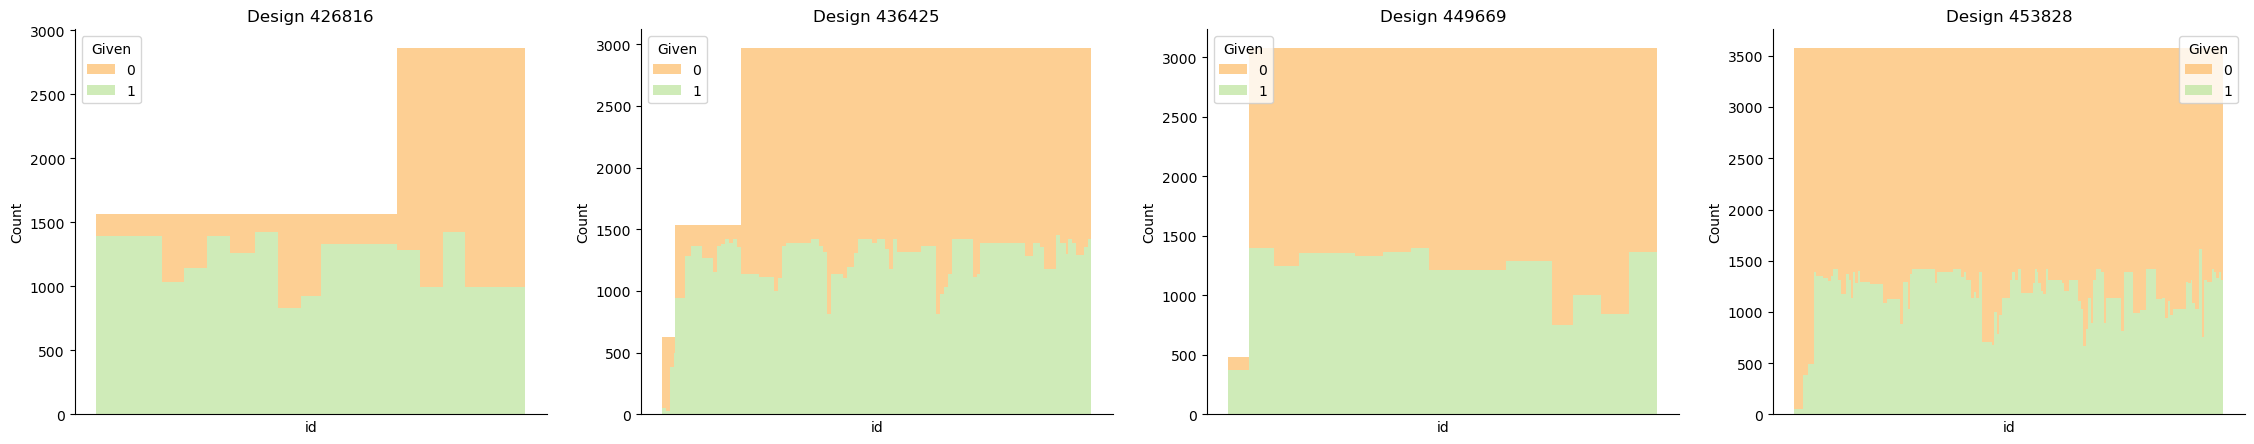

In [12]:
f, ax = plt.subplots(1,len(multi),figsize=(7*len(multi), 5))
sns.despine(f)

for i, sub_class in enumerate(multi):
        
    sns.histplot(
        data = df_lev.set_index(design_label).loc[sub_class],
        x=id_label, hue=given_label, multiple="stack",palette="Spectral",edgecolor=".3",linewidth=0,ax=ax[i])
    
    ax[i].axes.get_xaxis().set_ticks([])
    ax[i].set_title(f"Design {sub_class}")

## Can we take away some variables?
A part from some exceptions where the variables are completely missing, most of them are in some data and other don't

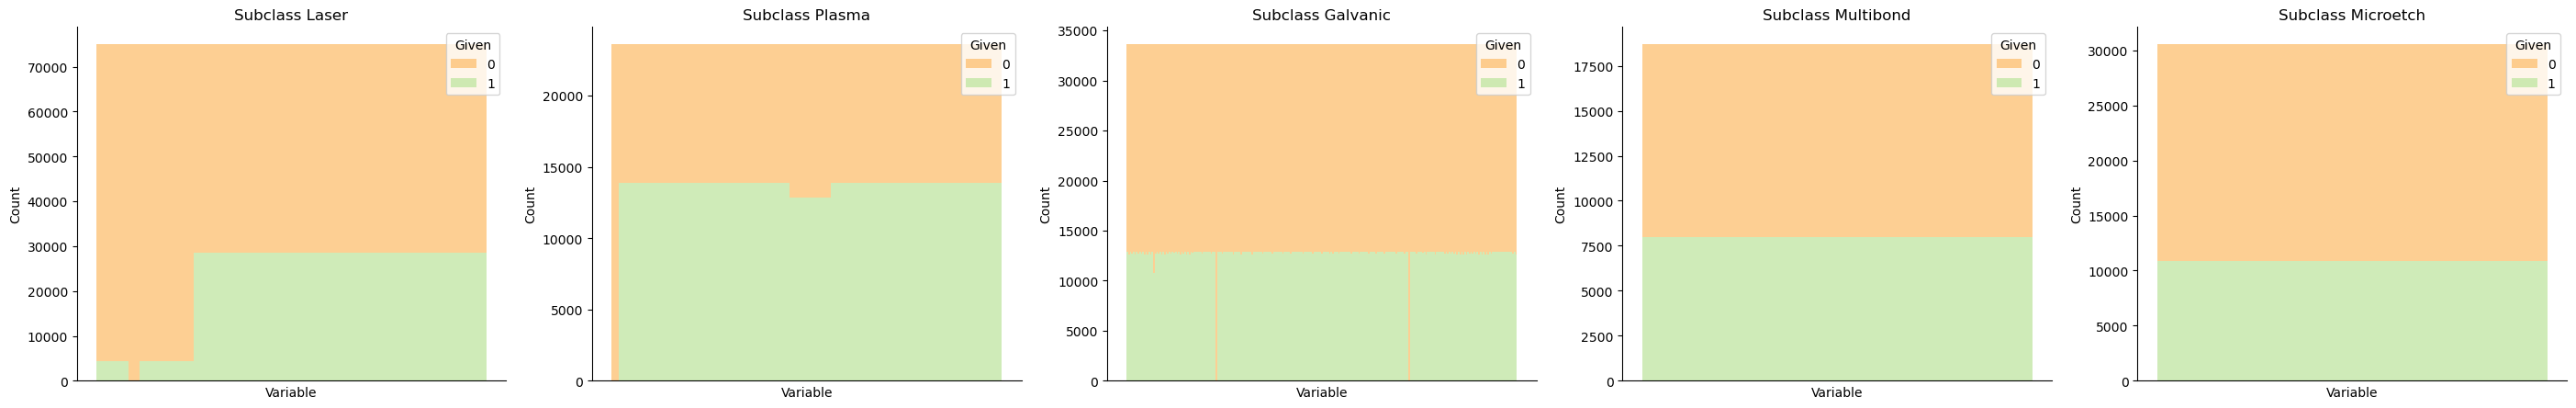

In [13]:
multi = processes
sub_label = process_label

f, ax = plt.subplots(1,len(multi),figsize=(7*len(multi), 5))
sns.despine(f)

for i, sub_class in enumerate(multi):
        
    sns.histplot(
        data = df_lev.set_index(sub_label).loc[sub_class],
        x=variable_label, hue=given_label, multiple="stack",palette="Spectral",edgecolor=".3",linewidth=0,ax=ax[i])
    
    ax[i].axes.get_xaxis().set_ticks([])
    ax[i].set_title(f"Subclass {sub_class}")